# 按照批量生成的方式，依据pipeline重新一遍
1. chunks, chunk4, topics, questions, answers, syndatas 
2. 批量接口，批量topics，批量questions，批量answers
3. 串起来所有的流程
4. 将其中 由web页面进行 批量任务的过程，改进成 代码实现的方式
方便全程自动化进行
5. 批量生成，也可以分成多个批次的pipeline同时进行

--chunks_path "outputs_chunks/article_chunks18.json" --chunk4_path "outputs_chunk4/article_chunk4_18.json" --topics_path "outputs_topics/article_topics18.json" --questions_path "outputs_questions/article_question_with_topic18.json" --answers_path "outputs_answers/article_answers_18.json" --syndatas_path "outputs_syndatas/syndatas18.json" --start_idx 36 --end_idx 38

In [ ]:
from utils.article_chunks_v2 import gen_chunks
data_dir = "data"
chunks_path = "outputs_pipeline/article1_chunks01.json"
start_idx = 0
end_idx = 5
gen_chunks(data_dir, chunks_path, start_idx, end_idx)

len(file_names): 3373


Chunking: 100%|██████████| 1/1 [00:00<00:00, 40.88file/s, chunks=34]


Chunks saved to outputs_pipeline/article1_chunks01.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 499.92file/s, chunks=26]


Chunks saved to outputs_pipeline/article1_chunks01.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 249.99file/s, chunks=37]


Chunks saved to outputs_pipeline/article1_chunks01.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 111.12file/s, chunks=24]


Chunks saved to outputs_pipeline/article1_chunks01.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 250.27file/s, chunks=25]

Chunks saved to outputs_pipeline/article1_chunks01.json
all chunks: 146


{}

In [ ]:
from utils.article_chunks_v2 import gen_chunks_v2
data_dir = "data"
chunks_path = "outputs_pipeline/article1_chunks01.json"
input_file="selected_papers.txt"
gen_chunks_v2(data_dir, chunks_path, input_file, start_idx=0, end_idx=100)


In [2]:
a = [1,2,3]
start, end = None, 5
a[start: end]

[1, 2, 3]

In [2]:
from utils.topic_concepts_v2 import trans_chunk4
chunks_path = "outputs_pipeline/article1_chunks01.json"
chunk4_path = "outputs_pipeline/article2_chunk4_01.json" 
trans_chunk4(chunks_path, chunk4_path)

resource module not available on Windows


d:\Miniconda3\envs\raft\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Chunk4 saved to outputs_pipeline/article2_chunk4_01.json
done 1,8-萘酰亚胺类有机小分子电致发光材料的研究进展_王启_llm_correct.md chunk4.
Chunk4 saved to outputs_pipeline/article2_chunk4_01.json
done 10万象素a-Si_TFT有源矩阵的优化技术_徐重阳_llm_correct.md chunk4.
Chunk4 saved to outputs_pipeline/article2_chunk4_01.json
done 10大新显示技术_llm_correct.md chunk4.
Chunk4 saved to outputs_pipeline/article2_chunk4_01.json
done 12.7cm彩色AM-OLED显示器分场驱动研究_沈亮_llm_correct.md chunk4.
Chunk4 saved to outputs_pipeline/article2_chunk4_01.json
done 12.7cm彩色AM-OLED显示屏的驱动模块_张繁_llm_correct.md chunk4.


In [ ]:
from utils.common_utils import build_openai_client_chat
from utils.topic_concepts_v2 import gen_topics
chunk4_path = "outputs_pipeline/article2_chunk4_01.json" 
topics_path = "outputs_pipeline/article3_topics01.json" 
chat_model = build_openai_client_chat()
gen_topics(chunk4_path, topics_path, chat_model)

In [ ]:
# 得到 gen_topic 任务的请求文件jsonl
from utils.topic_concepts_v2 import chunk4_to_jsonl
# 输入文件路径（假设是包含chunk4数据的JSON文件）
input_chunk4_path = "outputs_pipeline/article2_chunk4_01.json" 
# 输出文件路径
output_request_path = "outputs_pipeline/request1_topic_01.jsonl"
# 执行转换
chunk4_to_jsonl(input_chunk4_path, output_request_path)
# 剩下的任务在 火山平台 桶列表 和 批量推理列表中完成，并取到推理结果文件

resource module not available on Windows


d:\Miniconda3\envs\raft\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


转换完成，结果已保存到 outputs_pipeline/request1_topic_request_01.jsonl


In [1]:
# 根据 gen_topic 请求任务 获取 topic_path 结果文件
from utils.topic_concepts_v2 import process_response_file
# 响应结果文件路径（jsonl格式）
response_file_path = "outputs_pipeline/response1_topic_01.jsonl"
# 原始chunk4数据文件路径
chunk4_file_path = "outputs_pipeline/article2_chunk4_01.json" 
# 结果保存路径
topics_output_path = "outputs_pipeline/article3_topics01.json" 
# 执行处理
process_response_file(response_file_path, chunk4_file_path, topics_output_path)

resource module not available on Windows


d:\Miniconda3\envs\raft\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Processing responses: 100%|██████████| 20/20 [00:00<?, ?it/s]

处理完成，结果已保存到 outputs_pipeline/article3_topics01.json


In [1]:
from utils.topic_concepts_v2 import convert_topics_to_jsonl
topics_path = "outputs_pipeline/article3_topics01.json" 
question_request_path = "outputs_pipeline/request2_question_01.jsonl"
convert_topics_to_jsonl(topics_path, question_request_path)

resource module not available on Windows


d:\Miniconda3\envs\raft\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Processing 10大新显示技术_llm_correct.md: 100%|██████████| 5/5 [00:00<?, ?it/s]
Processing 1,8-萘酰亚胺类有机小分子电致发光材料的研究进展_王启_llm_correct.md: 100%|██████████| 5/5 [00:00<00:00, 5000.36it/s]
Processing 12.7cm彩色AM-OLED显示器分场驱动研究_沈亮_llm_correct.md: 100%|██████████| 3/3 [00:00<00:00, 2995.93it/s]
Processing 12.7cm彩色AM-OLED显示屏的驱动模块_张繁_llm_correct.md: 100%|██████████| 3/3 [00:00<00:00, 3000.93it/s]
Processing 10万象素a-Si_TFT有源矩阵的优化技术_徐重阳_llm_correct.md: 100%|██████████| 4/4 [00:00<00:00, 4000.29it/s]

成功将 outputs_pipeline/article3_topics01.json 转换为 outputs_pipeline/request2_question_01.jsonl


In [1]:
from utils.topic_concepts_v2 import process_response_and_save
response_path = "outputs_pipeline/response2_question_01.jsonl"  # 响应结果文件
topics_path = "outputs_pipeline/article3_topics01.json"       # 原始topics文件
question_path = "outputs_pipeline/article4_question_with_topic01.json"    # 输出question文件
chunk4_path = "outputs_pipeline/article2_chunk4_01.json"             # chunk4路径
process_response_and_save(response_path, topics_path, question_path, chunk4_path)

resource module not available on Windows


d:\Miniconda3\envs\raft\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Processing responses:  65%|██████▌   | 13/20 [00:00<00:00, 119.26it/s]

all chunks - chunk4_list: 116
Questions saved to outputs_pipeline/article4_question_with_topic01.json
all chunks - chunk4_list: 102
Questions saved to outputs_pipeline/article4_question_with_topic01.json
all chunks - chunk4_list: 102
Questions saved to outputs_pipeline/article4_question_with_topic01.json
all chunks - chunk4_list: 103
Questions saved to outputs_pipeline/article4_question_with_topic01.json
all chunks - chunk4_list: 111
Questions saved to outputs_pipeline/article4_question_with_topic01.json
all chunks - chunk4_list: 103
Questions saved to outputs_pipeline/article4_question_with_topic01.json
all chunks - chunk4_list: 103
Questions saved to outputs_pipeline/article4_question_with_topic01.json
all chunks - chunk4_list: 111
Questions saved to outputs_pipeline/article4_question_with_topic01.json
all chunks - chunk4_list: 102
Questions saved to outputs_pipeline/article4_question_with_topic01.json
all chunks - chunk4_list: 116
Questions saved to outputs_pipeline/article4_questio

Processing responses: 100%|██████████| 20/20 [00:00<00:00, 102.22it/s]


In [1]:
from utils.topic_concepts_v2 import sort_noisy_chunks
question_path = "outputs_pipeline/article4_question_with_topic01.json" 
sort_noisy_chunks(question_path)

resource module not available on Windows


d:\Miniconda3\envs\raft\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Sorted chunks.: 100%|██████████| 5/5 [03:15<00:00, 39.08s/it]

转换sorted_chunks成功。


In [ ]:
from utils.topic_concepts_v2 import gen_questions_with_topic_v3, sort_noisy_chunks
from utils.common_utils import build_openai_client_chat
topics_path = "outputs_pipeline/article3_topics01.json" 
questions_path = "outputs_pipeline/article4_question_with_topic01.json" 
chunk4_path = "outputs_pipeline/article2_chunk4_01.json" 
chat_model = build_openai_client_chat()
gen_questions_with_topic_v3(topics_path, questions_path, chat_model, chunk4_path)
sort_noisy_chunks(questions_path)

In [ ]:
from utils.answer_generation_v2 import convert_to_jsonl
# 输入输出路径
questions_path = "outputs_pipeline/article4_question_with_topic01.json"   # 替换为实际路径
question_request_path = "outputs_pipeline/request3_answer_02.jsonl"
# 执行转换
convert_to_jsonl(questions_path, question_request_path)

resource module not available on Windows


d:\Miniconda3\envs\raft\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


转换完成，结果已保存到 outputs_pipeline/request3_answer_02.jsonl


: 

In [ ]:
from utils.answer_generation_v2 import convert_to_jsonl
# 输入输出路径
questions_path = "outputs_pipeline/article4_question_with_topic01.json"   # 替换为实际路径
question_request_path = "outputs_pipeline/request3_answer_03.jsonl"  # 请求结果文件
# 执行转换
convert_to_jsonl(questions_path, question_request_path)

resource module not available on Windows
转换完成，结果已保存到 outputs_pipeline/request3_answer_03.jsonl


In [2]:
from utils.answer_generation_v2 import process_response_file
response_file_path = "outputs_pipeline/response3_answer_03.jsonl"  # 响应结果文件
questions_path = "outputs_pipeline/article4_question_with_topic01.json"  # 原始问题文件
answers_path = "outputs_pipeline/article5_answers_03.json"   # 结果保存路径
# 执行处理
process_response_file(response_file_path, questions_path, answers_path)

Processing responses:  60%|██████    | 24/40 [00:00<00:00, 223.10it/s]

Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.js

Processing responses: 100%|██████████| 40/40 [00:00<00:00, 125.94it/s]

Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
Answers saved to outputs_pipeline/article5_answers_03.json
处理完成，结果已保存到 outputs_pipeline/article5_answers_03.json


In [ ]:
from utils.answer_generation_v2 import process_response_file
response_file_path = "outputs_pipeline/response3_answer_02.jsonl"  # 响应结果文件
questions_path = "outputs_pipeline/article4_question_with_topic01.json"  # 原始问题文件
answers_path = "outputs_pipeline/article5_answers_02.json"   # 结果保存路径
# 执行处理
process_response_file(response_file_path, questions_path, answers_path)

resource module not available on Windows


d:\Miniconda3\envs\raft\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Processing responses:  32%|███▎      | 13/40 [00:00<00:00, 127.57it/s]

Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.js

Processing responses:  68%|██████▊   | 27/40 [00:00<00:00, 127.39it/s]

Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json
Answers saved to outputs_pipeline/article5_answers_02.json


Processing responses: 100%|██████████| 40/40 [00:00<00:00, 97.52it/s] 

处理完成，结果已保存到 outputs_pipeline/article5_answers_02.json


In [ ]:
from utils.answer_generation import gen_answer_v3
from utils.common_utils import build_openai_client_chat
chat_model = build_openai_client_chat()
questions_path = "outputs_pipeline/article4_question_with_topic01.json" 
answers_path = "outputs_pipeline/article5_answers_01.json" 
gen_answer_v3(questions_path, chat_model, answers_path)

In [3]:
from utils.data_synthesis_v2 import syn_data
answers_path = "outputs_pipeline/article5_answers_03.json" 
syndatas_path = "outputs_pipeline/syndatas02.json" 
syn_data(answers_path, syndatas_path)

Syndatas saved to outputs_pipeline/syndatas02.json
Syndatas saved to outputs_pipeline/syndatas02_instruction.json
done 10万象素a-Si_TFT有源矩阵的优化技术_徐重阳_llm_correct.md syndata.
Syndatas saved to outputs_pipeline/syndatas02.json
Syndatas saved to outputs_pipeline/syndatas02_instruction.json
done 1,8-萘酰亚胺类有机小分子电致发光材料的研究进展_王启_llm_correct.md syndata.
Syndatas saved to outputs_pipeline/syndatas02.json
Syndatas saved to outputs_pipeline/syndatas02_instruction.json
done 12.7cm彩色AM-OLED显示器分场驱动研究_沈亮_llm_correct.md syndata.
Syndatas saved to outputs_pipeline/syndatas02.json
Syndatas saved to outputs_pipeline/syndatas02_instruction.json
done 10大新显示技术_llm_correct.md syndata.
Syndatas saved to outputs_pipeline/syndatas02.json
Syndatas saved to outputs_pipeline/syndatas02_instruction.json
done 12.7cm彩色AM-OLED显示屏的驱动模块_张繁_llm_correct.md syndata.


In [3]:
from utils.data_synthesis_v2 import syn_data
answers_path = "outputs_pipeline/article5_answers_02.json" 
syndatas_path = "outputs_pipeline/syndatas01.json" 
syn_data(answers_path, syndatas_path)

Syndatas saved to outputs_pipeline/syndatas01.json
Syndatas saved to outputs_pipeline/syndatas01_instruction.json
done 1,8-萘酰亚胺类有机小分子电致发光材料的研究进展_王启_llm_correct.md syndata.
Syndatas saved to outputs_pipeline/syndatas01.json
Syndatas saved to outputs_pipeline/syndatas01_instruction.json
done 12.7cm彩色AM-OLED显示屏的驱动模块_张繁_llm_correct.md syndata.
Syndatas saved to outputs_pipeline/syndatas01.json
Syndatas saved to outputs_pipeline/syndatas01_instruction.json
done 10万象素a-Si_TFT有源矩阵的优化技术_徐重阳_llm_correct.md syndata.
Syndatas saved to outputs_pipeline/syndatas01.json
Syndatas saved to outputs_pipeline/syndatas01_instruction.json
done 10大新显示技术_llm_correct.md syndata.
Syndatas saved to outputs_pipeline/syndatas01.json
Syndatas saved to outputs_pipeline/syndatas01_instruction.json
done 12.7cm彩色AM-OLED显示器分场驱动研究_沈亮_llm_correct.md syndata.


In [ ]:
from utils.data_synthesis import syn_data_v2
answers_path = "outputs_pipeline/article5_answers_01.json" 
syndatas_path = "outputs_pipeline/syndatas01.json" 
syn_data_v2(answers_path, syndatas_path)


In [4]:
from utils.data_trans import trans_syn2excel
syndata_path = "outputs_pipeline/syndatas02.json" 
output_path = "outputs_excel/syndata_eval02.xlsx"
trans_syn2excel(syndata_path, output_path)

Excel文件已生成: outputs_excel/syndata_eval02.xlsx
总处理条目数: 40


In [4]:
from utils.data_trans import trans_syn2excel
syndata_path = "outputs_pipeline/syndatas01.json" 
output_path = "outputs_excel/syndata_eval01.xlsx"
trans_syn2excel(syndata_path, output_path)

Excel文件已生成: outputs_excel/syndata_eval01.xlsx
总处理条目数: 40


In [5]:
from utils.data_eval import excel_to_jsonl
input_excel_path = "outputs_excel/syndata_eval02.xlsx" 
output_jsonl_path = "outputs_excel/syndata_eval_request02_v1.jsonl"
excel_to_jsonl(input_excel_path, output_jsonl_path, prompt_version="v1")

转换完成，结果已保存到 outputs_excel/syndata_eval_request02_v1.jsonl


In [6]:
from utils.data_eval import excel_to_jsonl
input_excel_path = "outputs_excel/syndata_eval02.xlsx" 
output_jsonl_path = "outputs_excel/syndata_eval_request02_v2.jsonl"
excel_to_jsonl(input_excel_path, output_jsonl_path, prompt_version="v2")

转换完成，结果已保存到 outputs_excel/syndata_eval_request02_v2.jsonl


In [ ]:
from utils.data_eval import excel_to_jsonl
input_excel_path = "outputs_excel/syndata_eval01.xlsx" 
output_jsonl_path = "outputs_excel/syndata_eval_request01_v1.jsonl"
excel_to_jsonl(input_excel_path, output_jsonl_path, prompt_version="v1")

转换完成，结果已保存到 outputs_excel/syndata_eval_request01_v1.jsonl


In [6]:
from utils.data_eval import excel_to_jsonl
input_excel_path = "outputs_excel/syndata_eval01.xlsx" 
output_jsonl_path = "outputs_excel/syndata_eval_request01_v2.jsonl"
excel_to_jsonl(input_excel_path, output_jsonl_path, prompt_version="v2")

转换完成，结果已保存到 outputs_excel/syndata_eval_request01_v2.jsonl


## 新一轮，从gen_answer开始，到质量评估为止的流程

In [7]:
from utils.answer_generation_v2 import convert_to_jsonl
# 输入输出路径
questions_path = "outputs_pipeline/article4_question_with_topic01.json"   # 替换为实际路径
question_request_path = "outputs_pipeline/request3_answer_04.jsonl"  # 请求结果文件
# 执行转换
convert_to_jsonl(questions_path, question_request_path)

转换完成，结果已保存到 outputs_pipeline/request3_answer_04.jsonl


In [8]:
from utils.answer_generation_v2 import process_response_file
response_file_path = "outputs_pipeline/response3_answer_04.jsonl"  # 响应结果文件
questions_path = "outputs_pipeline/article4_question_with_topic01.json"  # 原始问题文件
answers_path = "outputs_pipeline/article5_answers_04.json"   # 结果保存路径
# 执行处理
process_response_file(response_file_path, questions_path, answers_path)

Processing responses:  60%|██████    | 24/40 [00:00<00:00, 125.01it/s]

Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.js

Processing responses: 100%|██████████| 40/40 [00:00<00:00, 99.91it/s] 

Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.json
Answers saved to outputs_pipeline/article5_answers_04.json
处理完成，结果已保存到 outputs_pipeline/article5_answers_04.json


In [9]:
from utils.data_synthesis_v2 import syn_data
answers_path = "outputs_pipeline/article5_answers_04.json" 
syndatas_path = "outputs_pipeline/syndatas03.json" 
syn_data(answers_path, syndatas_path)

Syndatas saved to outputs_pipeline/syndatas03.json
Syndatas saved to outputs_pipeline/syndatas03_instruction.json
done 12.7cm彩色AM-OLED显示器分场驱动研究_沈亮_llm_correct.md syndata.
Syndatas saved to outputs_pipeline/syndatas03.json
Syndatas saved to outputs_pipeline/syndatas03_instruction.json
done 10万象素a-Si_TFT有源矩阵的优化技术_徐重阳_llm_correct.md syndata.
Syndatas saved to outputs_pipeline/syndatas03.json
Syndatas saved to outputs_pipeline/syndatas03_instruction.json
done 1,8-萘酰亚胺类有机小分子电致发光材料的研究进展_王启_llm_correct.md syndata.
Syndatas saved to outputs_pipeline/syndatas03.json
Syndatas saved to outputs_pipeline/syndatas03_instruction.json
done 10大新显示技术_llm_correct.md syndata.
Syndatas saved to outputs_pipeline/syndatas03.json
Syndatas saved to outputs_pipeline/syndatas03_instruction.json
done 12.7cm彩色AM-OLED显示屏的驱动模块_张繁_llm_correct.md syndata.


In [10]:
from utils.data_trans import trans_syn2excel
syndata_path = "outputs_pipeline/syndatas03.json" 
output_path = "outputs_excel/syndata_eval03.xlsx"
trans_syn2excel(syndata_path, output_path)

Excel文件已生成: outputs_excel/syndata_eval03.xlsx
总处理条目数: 40


In [11]:
from utils.data_eval import excel_to_jsonl
input_excel_path = "outputs_excel/syndata_eval03.xlsx" 
output_jsonl_path = "outputs_excel/syndata_eval_request03_v1.jsonl"
excel_to_jsonl(input_excel_path, output_jsonl_path, prompt_version="v1")

转换完成，结果已保存到 outputs_excel/syndata_eval_request03_v1.jsonl


In [12]:
from utils.data_eval import excel_to_jsonl
input_excel_path = "outputs_excel/syndata_eval03.xlsx" 
output_jsonl_path = "outputs_excel/syndata_eval_request03_v2.jsonl"
excel_to_jsonl(input_excel_path, output_jsonl_path, prompt_version="v2")

转换完成，结果已保存到 outputs_excel/syndata_eval_request03_v2.jsonl


Total entries processed: 40
Successfully parsed: 40
Parse errors: 0

Quality Statistics:
Medium: Count = 19, Percentage = 47.50%
High: Count = 21, Percentage = 52.50%


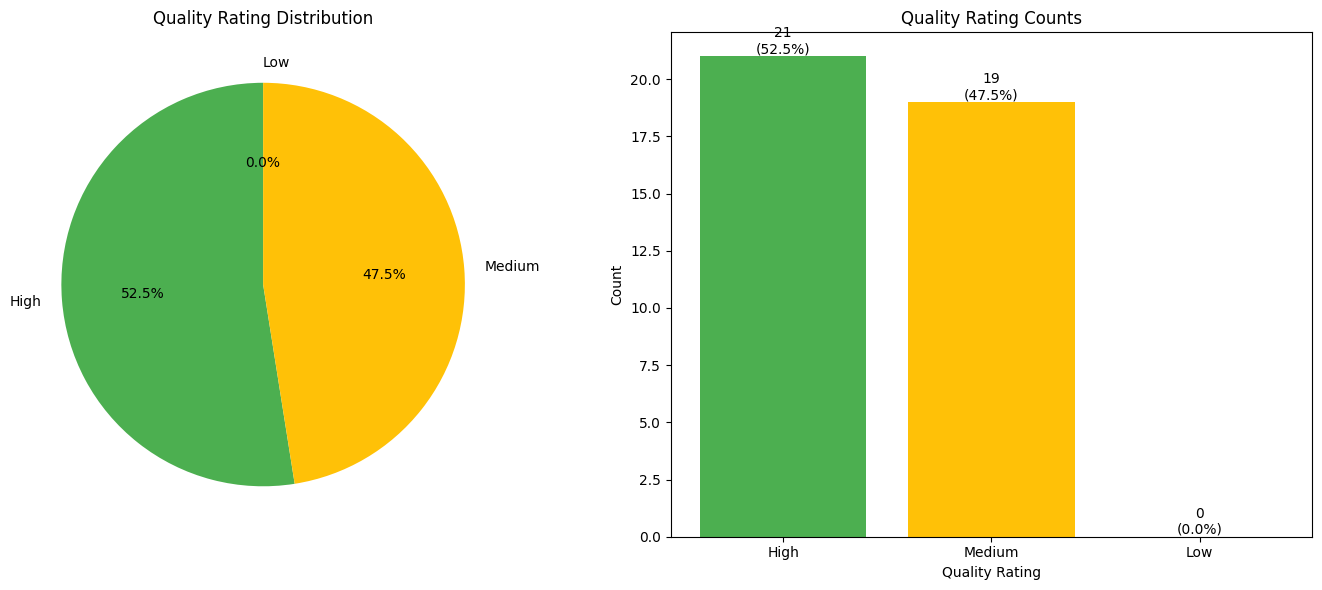

In [1]:
from utils.data_eval import show_quality
jsonl_file = 'outputs_excel/results_v2_03.jsonl'  # 替换为您的jsonl文件路径
show_quality(jsonl_file)

Total entries processed: 40
Successfully parsed: 40
Parse errors: 0

Quality Statistics:
High: Count = 33, Percentage = 82.50%
Medium: Count = 7, Percentage = 17.50%


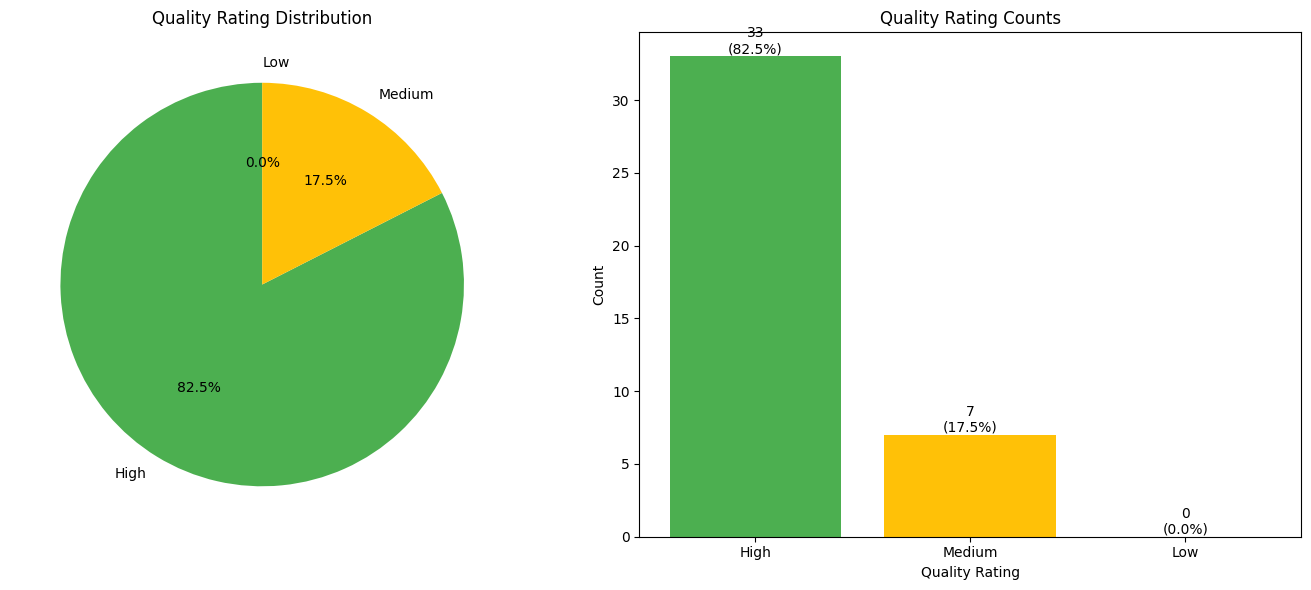

In [2]:
from utils.data_eval import show_quality
jsonl_file = 'outputs_excel/results_v1_03.jsonl'  # 替换为您的jsonl文件路径
show_quality(jsonl_file)

## 新一轮，从gen_chunk开始，到质量评估为止的流程

In [1]:
from utils.article_chunks_v2 import gen_chunks_v2
data_dir = "data"
chunks_path = "outputs_pipeline/article1_chunks02.json"
input_file="selected_papers.txt"
gen_chunks_v2(data_dir, chunks_path, input_file, start_idx=0, end_idx=100)

成功从 selected_papers.txt 读取 397 篇论文标题
filenames: 100


Chunking: 100%|██████████| 1/1 [00:00<00:00, 66.67file/s, chunks=38]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 124.84file/s, chunks=24]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 43.46file/s, chunks=20]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 83.27file/s, chunks=11]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 83.36file/s, chunks=23]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 500.27file/s, chunks=25]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 1000.07file/s, chunks=24]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 83.29file/s, chunks=40]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 499.92file/s, chunks=23]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 500.16file/s, chunks=21]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 333.44file/s, chunks=18]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 333.30file/s, chunks=25]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 55.55file/s, chunks=54]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 76.92file/s, chunks=23]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 83.33file/s, chunks=41]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 76.92file/s, chunks=50]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 76.91file/s, chunks=14]

Chunks saved to outputs_pipeline/article1_chunks02.json

Chunking: 100%|██████████| 1/1 [00:00<00:00, 333.23file/s, chunks=38]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 76.92file/s, chunks=17]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 76.93file/s, chunks=8]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 111.10file/s, chunks=45]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 83.33file/s, chunks=4]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 499.98file/s, chunks=12]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 200.03file/s, chunks=19]

Chunks saved to outputs_pipeline/article1_chunks02.json

Chunking: 100%|██████████| 1/1 [00:00<00:00, 499.92file/s, chunks=9]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 76.93file/s, chunks=18]

Chunks saved to outputs_pipeline/article1_chunks02.json

Chunking: 100%|██████████| 1/1 [00:00<00:00, 499.62file/s, chunks=13]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 500.27file/s, chunks=25]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 90.91file/s, chunks=16]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 76.92file/s, chunks=32]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 76.92file/s, chunks=23]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 76.92file/s, chunks=33]

Chunks saved to outputs_pipeline/article1_chunks02.json



Chunking: 100%|██████████| 1/1 [00:00<00:00, 90.92file/s, chunks=18]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 500.81file/s, chunks=34]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 100.00file/s, chunks=20]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 500.04file/s, chunks=9]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 499.44file/s, chunks=22]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 90.83file/s, chunks=25]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 500.10file/s, chunks=29]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 111.00file/s, chunks=28]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 111.11file/s, chunks=26]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 500.10file/s, chunks=26]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 499.98file/s, chunks=15]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 499.92file/s, chunks=11]

Chunks saved to outputs_pipeline/article1_chunks02.json

Chunking: 100%|██████████| 1/1 [00:00<00:00, 499.92file/s, chunks=8]

Chunks saved to outputs_pipeline/article1_chunks02.json

Chunking: 100%|██████████| 1/1 [00:00<00:00, 499.98file/s, chunks=28]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 500.45file/s, chunks=6]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 500.16file/s, chunks=48]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 83.32file/s, chunks=18]

Chunks saved to outputs_pipeline/article1_chunks02.json

Chunking: 100%|██████████| 1/1 [00:00<00:00, 76.87file/s, chunks=46]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 500.10file/s, chunks=32]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 62.47file/s, chunks=62]

Chunks saved to outputs_pipeline/article1_chunks02.json

Chunking: 100%|██████████| 1/1 [00:00<00:00, 125.01file/s, chunks=80]

Chunks saved to outputs_pipeline/article1_chunks02.json

Chunking: 100%|██████████| 1/1 [00:00<00:00, 142.82file/s, chunks=25]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 333.57file/s, chunks=29]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 142.90file/s, chunks=9]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 500.22file/s, chunks=40]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 52.63file/s, chunks=32]

Chunks saved to outputs_pipeline/article1_chunks02.json



Chunking: 100%|██████████| 1/1 [00:00<00:00, 199.96file/s, chunks=35]

Chunks saved to outputs_pipeline/article1_chunks02.json

Chunking: 100%|██████████| 1/1 [00:00<00:00, 250.08file/s, chunks=73]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 83.36file/s, chunks=84]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 333.68file/s, chunks=43]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 500.33file/s, chunks=5]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 499.98file/s, chunks=35]

Chunks saved to outputs_pipeline/article1_chunks02.json

Chunking: 100%|██████████| 1/1 [00:00<00:00, 64.90file/s, chunks=72]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 499.56file/s, chunks=20]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 76.85file/s, chunks=32]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 499.92file/s, chunks=19]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 117.66file/s, chunks=80]

Chunks saved to outputs_pipeline/article1_chunks02.json



Chunking: 100%|██████████| 1/1 [00:00<00:00, 333.12file/s, chunks=37]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 500.16file/s, chunks=19]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 1000.07file/s, chunks=30]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 500.39file/s, chunks=22]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 62.48file/s, chunks=90]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 499.80file/s, chunks=28]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 500.39file/s, chunks=17]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 38.45file/s, chunks=35]

Chunks saved to outputs_pipeline/article1_chunks02.json

Chunking: 100%|██████████| 1/1 [00:00<00:00, 100.00file/s, chunks=29]

Chunks saved to outputs_pipeline/article1_chunks02.json



Chunking: 100%|██████████| 1/1 [00:00<00:00, 499.68file/s, chunks=30]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 333.33file/s, chunks=55]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 500.10file/s, chunks=24]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 499.92file/s, chunks=14]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 108.27file/s, chunks=14]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 32.25file/s, chunks=16]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 45.45file/s, chunks=16]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 62.50file/s, chunks=65]

Chunks saved to outputs_pipeline/article1_chunks02.json

Chunking: 100%|██████████| 1/1 [00:00<00:00, 200.02file/s, chunks=52]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 499.74file/s, chunks=9]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 333.28file/s, chunks=40]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 500.45file/s, chunks=3]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 500.22file/s, chunks=32]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 500.16file/s, chunks=58]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 999.36file/s, chunks=11]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 333.38file/s, chunks=36]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 199.53file/s, chunks=22]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 52.61file/s, chunks=50]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 250.05file/s, chunks=79]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 41.63file/s, chunks=44]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 90.89file/s, chunks=98]


Chunks saved to outputs_pipeline/article1_chunks02.json


Chunking: 100%|██████████| 1/1 [00:00<00:00, 502.73file/s, chunks=17]


Chunks saved to outputs_pipeline/article1_chunks02.json
all chunks: 3102


{}

In [2]:
from utils.topic_concepts_v2 import trans_chunk4
chunks_path = "outputs_pipeline/article1_chunks02.json"
chunk4_path = "outputs_pipeline/article2_chunk4_02.json" 
trans_chunk4(chunks_path, chunk4_path)

resource module not available on Windows
Chunk4 saved to outputs_pipeline/article2_chunk4_02.json
done 一种被动矩阵OLED的混合控制驱动方法(英文)_唐智杰_llm_correct.md chunk4.
Chunk4 saved to outputs_pipeline/article2_chunk4_02.json
done 内藏液晶显示控制器T6963C与DSP的接口应用_何轩_llm_correct.md chunk4.
Chunk4 saved to outputs_pipeline/article2_chunk4_02.json
done 一种集成于I_O的段码式LCD驱动IP核设计_陈洁_llm_correct.md chunk4.
Chunk4 saved to outputs_pipeline/article2_chunk4_02.json
done 基于51单片机的TFT液晶显示设计分析_李梦_llm_correct.md chunk4.
Chunk4 saved to outputs_pipeline/article2_chunk4_02.json
done 基于PXA310和WINCE的LCD驱动移植开发_敬铅_llm_correct.md chunk4.
Chunk4 saved to outputs_pipeline/article2_chunk4_02.json
done 一种非规则TFT-LCD的...及其时序控制的FPGA实现_程松华_llm_correct.md chunk4.
Chunk4 saved to outputs_pipeline/article2_chunk4_02.json
done 一种抑制AMOLED显示中电流震荡的新型GOA电路研究-张留旗_llm_correct.md chunk4.
Chunk4 saved to outputs_pipeline/article2_chunk4_02.json
done Micro-LED显示及驱动IC技术_张丽_llm_correct.md chunk4.
Chunk4 saved to outputs_pipeline/article2_chunk4_02.json
d

In [3]:
# 得到 gen_topic 任务的请求文件jsonl
from utils.topic_concepts_v2 import chunk4_to_jsonl
# 输入文件路径（假设是包含chunk4数据的JSON文件）
input_chunk4_path = "outputs_pipeline/article2_chunk4_02.json" 
# 输出文件路径
output_request_path = "outputs_pipeline/request1_topic_02.jsonl"
# 执行转换
chunk4_to_jsonl(input_chunk4_path, output_request_path)
# 剩下的任务在 火山平台 桶列表 和 批量推理列表中完成，并取到推理结果文件

转换完成，结果已保存到 outputs_pipeline/request1_topic_02.jsonl


In [4]:
# 根据 gen_topic 请求任务 获取 topic_path 结果文件
from utils.topic_concepts_v2 import process_response_file
# 响应结果文件路径（jsonl格式）
response_file_path = "outputs_pipeline/response1_topic_02.jsonl"
# 原始chunk4数据文件路径
chunk4_file_path = "outputs_pipeline/article2_chunk4_02.json" 
# 结果保存路径
topics_output_path = "outputs_pipeline/article3_topics02.json" 
# 执行处理
process_response_file(response_file_path, chunk4_file_path, topics_output_path)

Processing responses: 100%|██████████| 424/424 [00:00<00:00, 211914.31it/s]

处理完成，结果已保存到 outputs_pipeline/article3_topics02.json


In [5]:
from utils.topic_concepts_v2 import convert_topics_to_jsonl
topics_path = "outputs_pipeline/article3_topics02.json" 
question_request_path = "outputs_pipeline/request2_question_02.jsonl"
convert_topics_to_jsonl(topics_path, question_request_path)

Processing 有机发光二极管空穴传输层探究_王志奇_llm_correct.md: 100%|██████████| 3/3 [00:00<00:00, 3011.71it/s]
Processing 有机电致发光器件(OLED)的制备方法和工艺_杨辉_llm_correct.md: 100%|██████████| 9/9 [00:00<00:00, 9030.80it/s]
Processing 有机自旋光电子学的基本过程_何磊_llm_correct.md: 100%|██████████| 14/14 [00:00<00:00, 932.22it/s]
Processing 基于激基复合物主体的高效T...磷光杂化白光有机发光二极管_张渊博_llm_correct.md: 100%|██████████| 9/9 [00:00<00:00, 4505.70it/s]
Processing 应用于AMOLED源极驱动...DAC功能的输出缓冲器设计_孙蕊_llm_correct.md: 100%|██████████| 7/7 [00:00<00:00, 7007.19it/s]
Processing TFT液晶显示驱动电路与电源优化设计方法_高潮_llm_correct.md: 100%|██████████| 3/3 [00:00<?, ?it/s]
Processing 有机发光二极管老化机制_牛泉_llm_correct.md: 100%|██████████| 11/11 [00:00<00:00, 5497.12it/s]
Processing 有机发光二极管中ADN掺杂....54μm电致发光(英文)_屈海京_llm_correct.md: 100%|██████████| 6/6 [00:00<00:00, 6027.74it/s]
Processing 基于STM32的FSMC接口驱动TFT彩屏设计_汤莉莉_llm_correct.md: 100%|██████████| 4/4 [00:00<00:00, 266.67it/s]
Processing 一种被动矩阵OLED的混合控制驱动方法(英文)_唐智杰_llm_correct.md: 100%|██████████| 5/5 [00:00<?, ?it/s]
Processing

成功将 outputs_pipeline/article3_topics02.json 转换为 outputs_pipeline/request2_question_02.jsonl


In [1]:
from utils.topic_concepts_v2 import process_response_and_save
response_path = "outputs_pipeline/response2_question_02.jsonl"  # 响应结果文件
topics_path = "outputs_pipeline/article3_topics02.json"       # 原始topics文件
question_path = "outputs_pipeline/article4_question_with_topic02.json"    # 输出question文件
chunk4_path = "outputs_pipeline/article2_chunk4_02.json"             # chunk4路径
process_response_and_save(response_path, topics_path, question_path, chunk4_path)

resource module not available on Windows
device: cuda


Processing responses:  47%|████▋     | 198/424 [00:14<00:20, 10.82it/s]

初始 JSON 解析错误: <string>:7 Unexpected "1" at column 59
尝试修复常见问题...
最终 JSON 解析失败: <string>:7 Unexpected "1" at column 59
Failed to parse questions for request-144
初始 JSON 解析错误: <string>:12 Unexpected "-" at column 1
尝试修复常见问题...
最终 JSON 解析失败: <string>:12 Unexpected "-" at column 1
Failed to parse questions for request-150


Processing responses: 100%|██████████| 424/424 [00:54<00:00,  7.79it/s]


In [2]:
from utils.topic_concepts_v2 import sort_noisy_chunks
question_path = "outputs_pipeline/article4_question_with_topic02.json" 
sort_noisy_chunks(question_path)

Sorted chunks.: 100%|██████████| 98/98 [10:54<00:00,  6.68s/it]

转换sorted_chunks成功。


In [1]:
from utils.answer_generation_v2 import convert_to_jsonl
# 输入输出路径
questions_path = "outputs_pipeline/article4_question_with_topic02.json"   # 替换为实际路径
answer_request_path = "outputs_pipeline/request3_answer02_1.jsonl"
# 执行转换
convert_to_jsonl(questions_path, answer_request_path)

resource module not available on Windows
device: cuda
转换完成，结果已保存到 outputs_pipeline/request3_answer02_1.jsonl


In [1]:
from utils.answer_generation_v2 import process_response_file
response_file_path = "outputs_pipeline/response3_answer02_1.jsonl"  # 响应结果文件
questions_path = "outputs_pipeline/article4_question_with_topic02.json"  # 原始问题文件
answers_path = "outputs_pipeline/article5_answers02_2.json"   # 结果保存路径
# 执行处理
process_response_file(response_file_path, questions_path, answers_path)

resource module not available on Windows
device: cuda


Processing responses: 100%|██████████| 844/844 [01:51<00:00,  7.58it/s]

处理完成，结果已保存到 outputs_pipeline/article5_answers02_2.json


In [1]:
from utils.data_synthesis_v2 import syn_data_v3
answers_path = "outputs_pipeline/article5_answers02_2.json" 
syndatas_path = "outputs_pipeline/syndatas02_2.json" 
syn_data_v3(answers_path, syndatas_path)

resource module not available on Windows
device: cuda
done 以聚乙烯亚胺作为电子注入层的有机-无机复合发光器件_雷勇_llm_correct.md syndata.
done 有机电致发光器件(OLED)的制备方法和工艺_杨辉_llm_correct.md syndata.
done 一种结构简单的IGZO_T..._AMOLED像素补偿电路_王兰兰_llm_correct.md syndata.
done 基于ARM处理器S3C2440的VGA显示技术_方鹏_llm_correct.md syndata.
done OLED微显示器驱动控制电路研究_陈建军_llm_correct.md syndata.
done 有机发光材料与器件研究进展_段炼_llm_correct.md syndata.
done 有机发光二极管老化机制_牛泉_llm_correct.md syndata.
done 含有芘基团的电致发光材料的研究进展_薛震_llm_correct.md syndata.
done 基于LM3S1138的OLED寿命检测仪_党宏社_llm_correct.md syndata.
done 有机发光二极管显示屏的喷墨打印研究与展望_刘欣_llm_correct.md syndata.
done Micro-LED显示及驱动IC技术_张丽_llm_correct.md syndata.
done 低功耗硅基OLED微显示器的区域梯度调光策略_季渊_llm_correct.md syndata.
done 基于闭环二苯醚与磷氧基团的...磷光有机发光二极管中的应用_袁晓冬_llm_correct.md syndata.
done 新型有机发光二极管器件的研究进展_徐汀_llm_correct.md syndata.
done 基于连续性掺杂的高效全荧光白色有机电致发光器件的研究_吴清洋_llm_correct.md syndata.
done 有机发光二极管空穴传输层探究_王志奇_llm_correct.md syndata.
done 一种抑制AMOLED显示中电流震荡的新型GOA电路研究-张留旗_llm_correct.md syndata.
done 利用原子层沉积技术实现有机电致发光器件的薄膜封装_

In [2]:
from utils.data_synthesis_v2 import syn_data
answers_path = "outputs_pipeline/article5_answers02_1.json" 
syndatas_path = "outputs_pipeline/syndatas02_1.json" 
syn_data(answers_path, syndatas_path)

done 以聚乙烯亚胺作为电子注入层的有机-无机复合发光器件_雷勇_llm_correct.md syndata.
done 有机电致发光器件(OLED)的制备方法和工艺_杨辉_llm_correct.md syndata.
done 一种结构简单的IGZO_T..._AMOLED像素补偿电路_王兰兰_llm_correct.md syndata.
done 基于ARM处理器S3C2440的VGA显示技术_方鹏_llm_correct.md syndata.
done OLED微显示器驱动控制电路研究_陈建军_llm_correct.md syndata.
done 有机发光材料与器件研究进展_段炼_llm_correct.md syndata.
done 有机发光二极管老化机制_牛泉_llm_correct.md syndata.
done 含有芘基团的电致发光材料的研究进展_薛震_llm_correct.md syndata.
done 基于LM3S1138的OLED寿命检测仪_党宏社_llm_correct.md syndata.
done 有机发光二极管显示屏的喷墨打印研究与展望_刘欣_llm_correct.md syndata.
done Micro-LED显示及驱动IC技术_张丽_llm_correct.md syndata.
done 低功耗硅基OLED微显示器的区域梯度调光策略_季渊_llm_correct.md syndata.
done 基于闭环二苯醚与磷氧基团的...磷光有机发光二极管中的应用_袁晓冬_llm_correct.md syndata.
done 新型有机发光二极管器件的研究进展_徐汀_llm_correct.md syndata.
done 基于连续性掺杂的高效全荧光白色有机电致发光器件的研究_吴清洋_llm_correct.md syndata.
done 有机发光二极管空穴传输层探究_王志奇_llm_correct.md syndata.
done 一种抑制AMOLED显示中电流震荡的新型GOA电路研究-张留旗_llm_correct.md syndata.
done 利用原子层沉积技术实现有机电致发光器件的薄膜封装_刘春艳_llm_correct.md syndata.
done 有机发光二极管中ADN掺杂....54μm

In [ ]:
from utils.data_trans import trans_syn2excel
syndata_path = "outputs_pipeline/syndatas02_1.json" 
output_path = "outputs_excel/syndata_eval02_1.xlsx"
trans_syn2excel(syndata_path, output_path)

In [1]:
from utils.data_eval import syndatas_to_jsonl
syndata_path = "outputs_pipeline/syndatas02_2.json" 
output_jsonl_path = "outputs_excel/syndata_eval_request02_2_v1.jsonl"
syndatas_to_jsonl(syndata_path, output_jsonl_path, prompt_version="v1")

转换完成，结果已保存到 outputs_excel/syndata_eval_request02_2_v1.jsonl


In [2]:
from utils.data_eval import syndatas_to_jsonl
syndata_path = "outputs_pipeline/syndatas02_2.json" 
output_jsonl_path = "outputs_excel/syndata_eval_request02_2_v2.jsonl"
syndatas_to_jsonl(syndata_path, output_jsonl_path, prompt_version="v2")

转换完成，结果已保存到 outputs_excel/syndata_eval_request02_2_v2.jsonl


Total entries processed: 100
Successfully parsed: 100
Parse errors: 0

Quality Statistics:
Medium: Count = 51, Percentage = 51.00%
High: Count = 44, Percentage = 44.00%
Low: Count = 5, Percentage = 5.00%


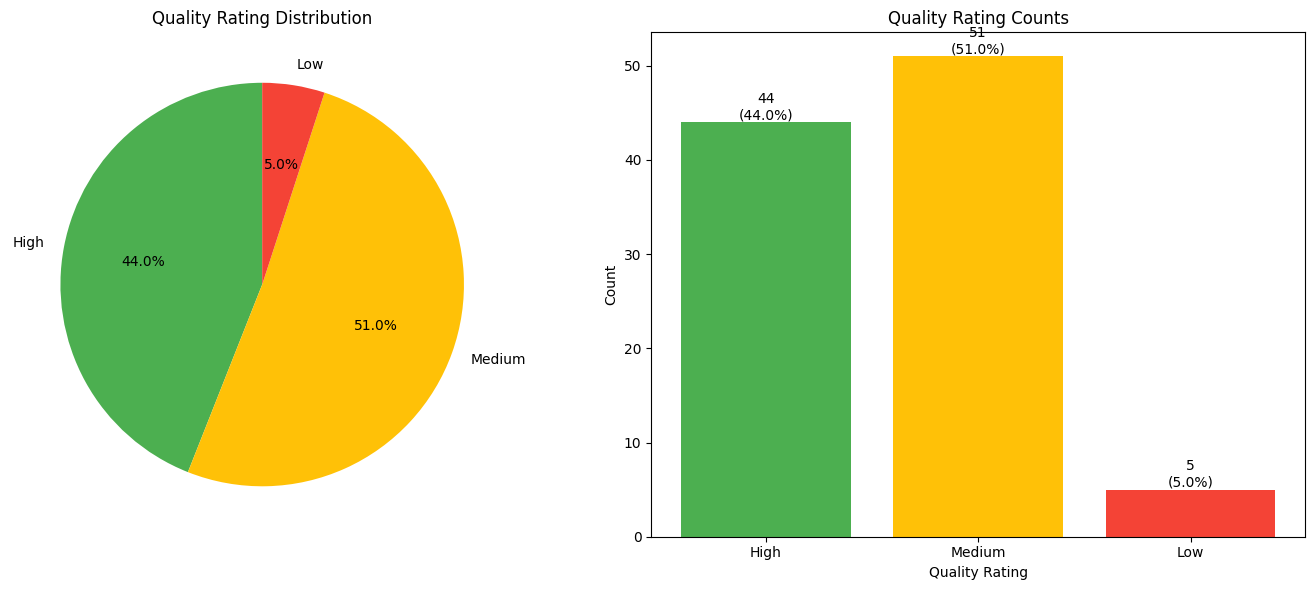

In [3]:
from utils.data_eval import show_quality
jsonl_file = 'outputs_excel/results02_1_v2.jsonl'  # 替换为您的jsonl文件路径
show_quality(jsonl_file)

Total entries processed: 100
Successfully parsed: 100
Parse errors: 0

Quality Statistics:
Medium: Count = 48, Percentage = 48.00%
High: Count = 50, Percentage = 50.00%
Low: Count = 2, Percentage = 2.00%


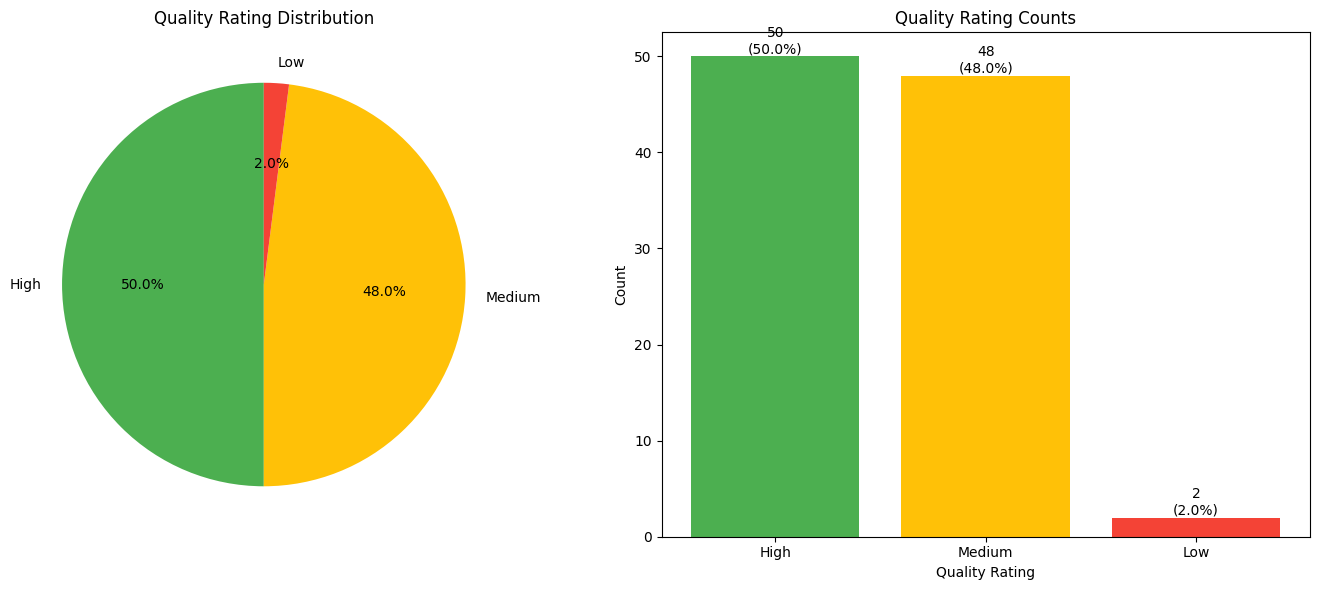

In [4]:
from utils.data_eval import show_quality
jsonl_file = 'outputs_excel/results02_2_v2.jsonl'  # 替换为您的jsonl文件路径
show_quality(jsonl_file)

Total entries processed: 100
Successfully parsed: 100
Parse errors: 0

Quality Statistics:
Low: Count = 5, Percentage = 5.00%
High: Count = 54, Percentage = 54.00%
Medium: Count = 41, Percentage = 41.00%


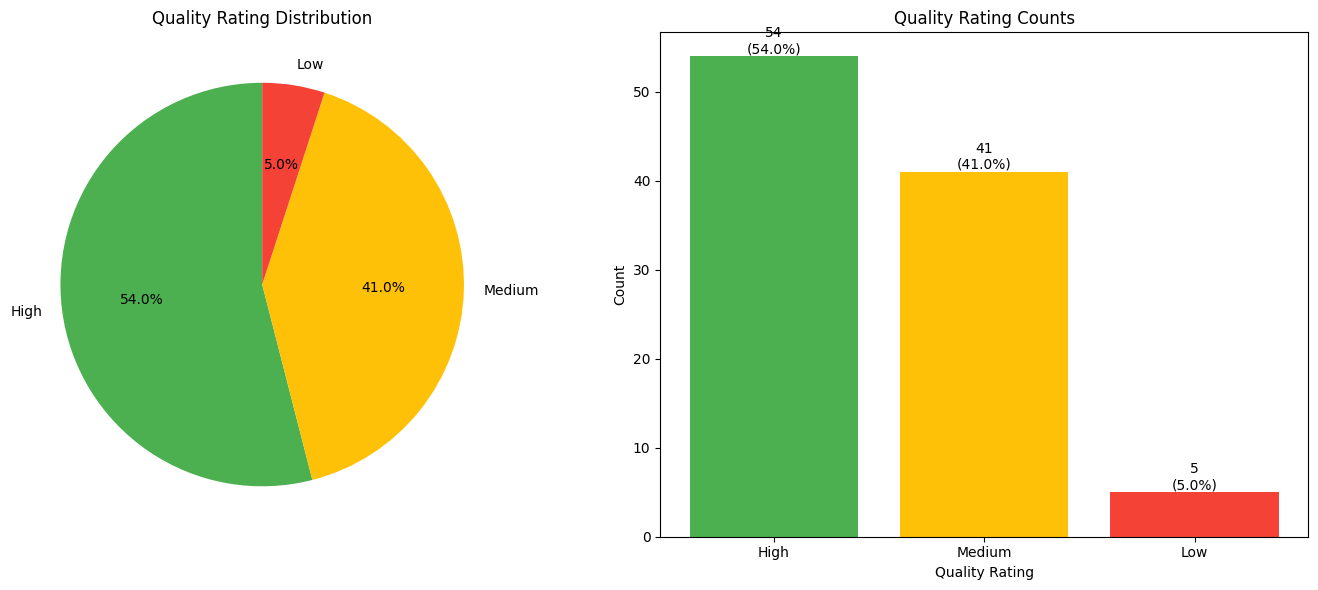

In [8]:
from utils.data_eval import show_quality
jsonl_file = 'outputs_excel/results02_3_v2.jsonl'  # 替换为您的jsonl文件路径
show_quality(jsonl_file)

Total entries processed: 100
Successfully parsed: 100
Parse errors: 0

Quality Statistics:
High: Count = 96, Percentage = 96.00%
Medium: Count = 4, Percentage = 4.00%


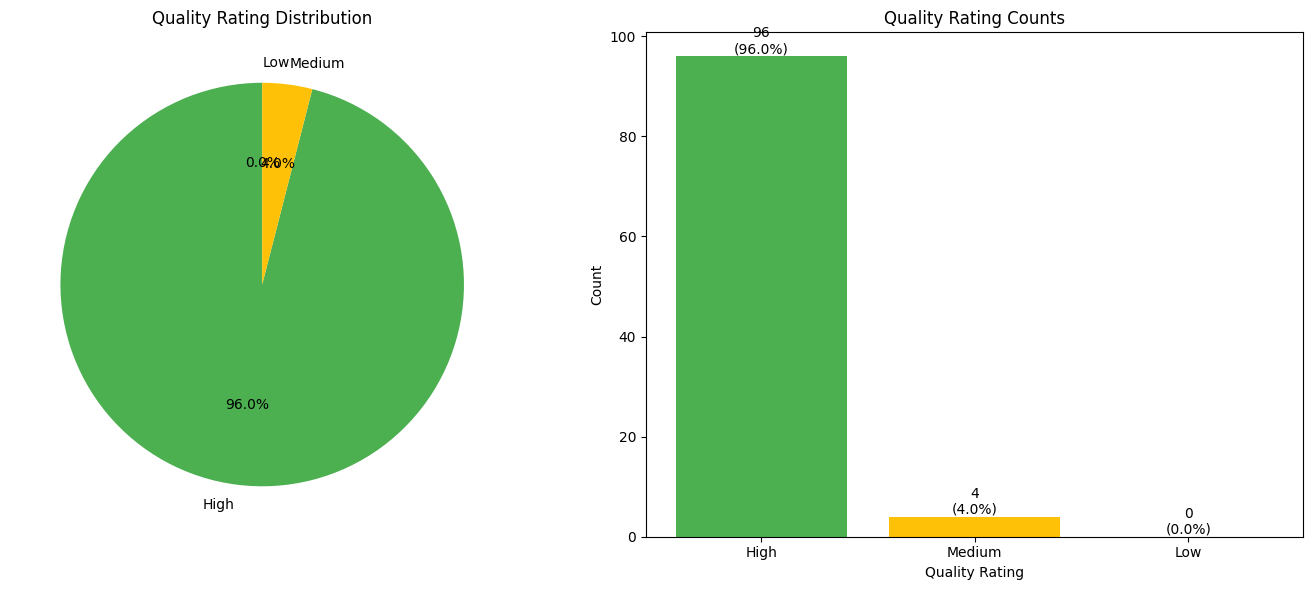

In [5]:
from utils.data_eval import show_quality
jsonl_file = 'outputs_excel/results02_1_v1.jsonl'  # 替换为您的jsonl文件路径
show_quality(jsonl_file)

Total entries processed: 100
Successfully parsed: 100
Parse errors: 0

Quality Statistics:
High: Count = 89, Percentage = 89.00%
Medium: Count = 11, Percentage = 11.00%


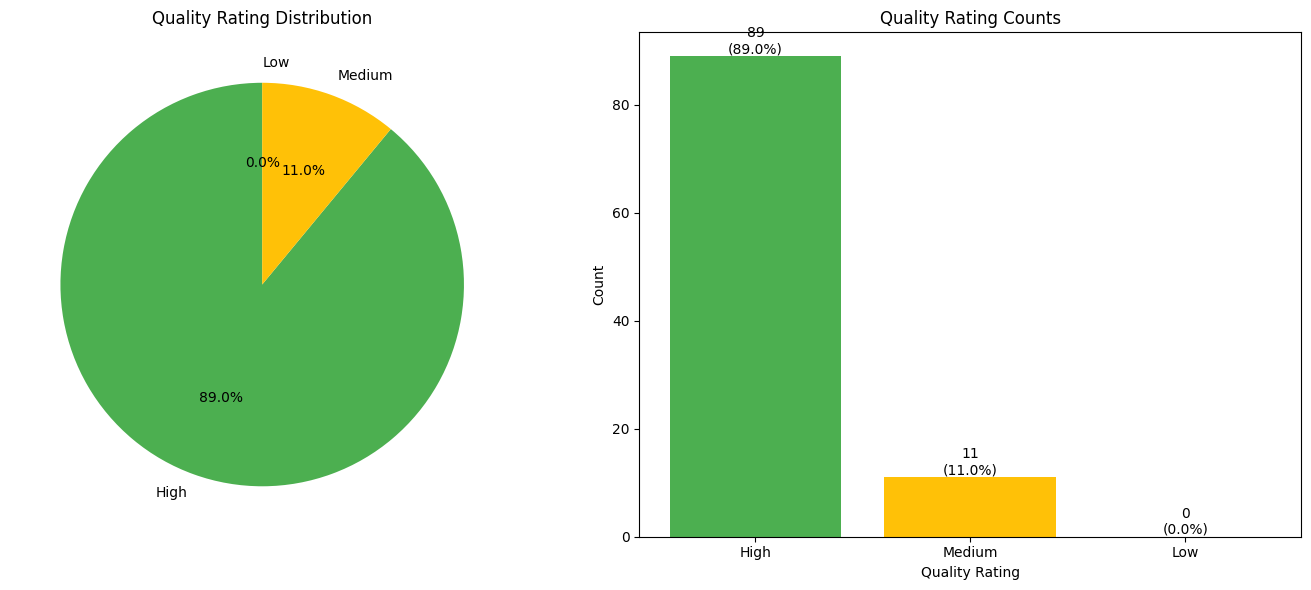

In [6]:
from utils.data_eval import show_quality
jsonl_file = 'outputs_excel/results02_2_v1.jsonl'  # 替换为您的jsonl文件路径
show_quality(jsonl_file)

Total entries processed: 100
Successfully parsed: 100
Parse errors: 0

Quality Statistics:
High: Count = 92, Percentage = 92.00%
Medium: Count = 8, Percentage = 8.00%


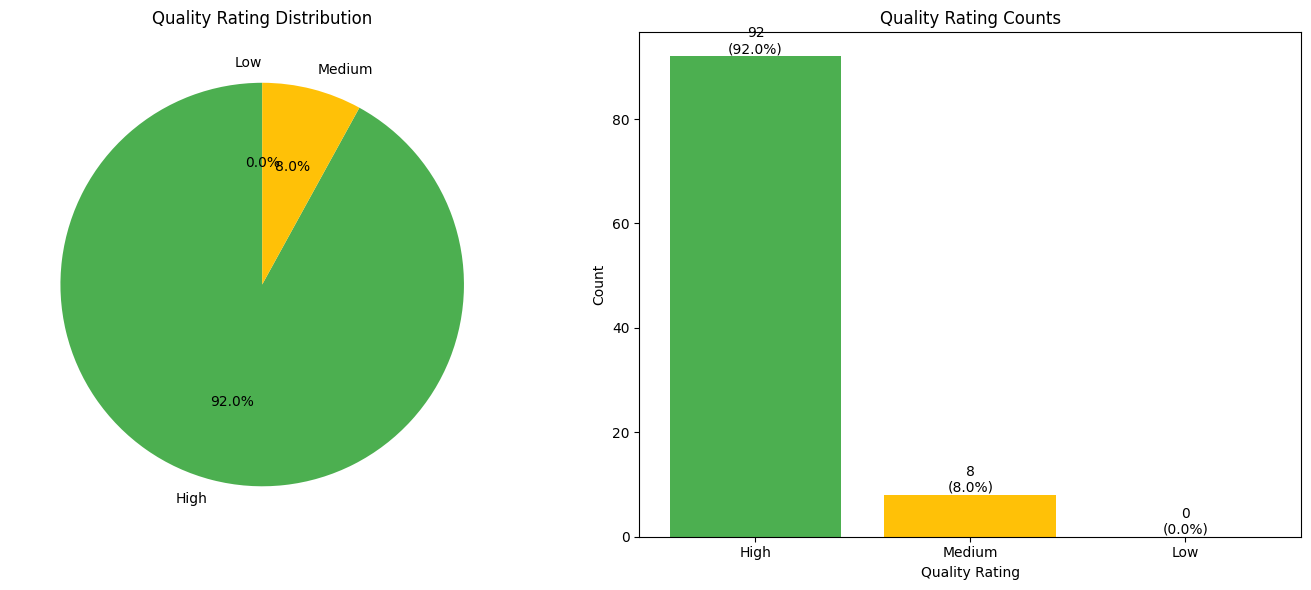

In [7]:
from utils.data_eval import show_quality
jsonl_file = 'outputs_excel/results02_3_v1.jsonl'  # 替换为您的jsonl文件路径
show_quality(jsonl_file)